In [2]:
"""
Cellule 1 : Chargement des données .npy
"""

import numpy as np

X_train = np.load("./data/X_train.npy")
y_train = np.load("./data/y_train.npy")
X_test  = np.load("./data/X_test.npy")
y_test  = np.load("./data/y_test.npy")

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")


X_train shape : (200, 200)
X_test shape  : (200, 200)


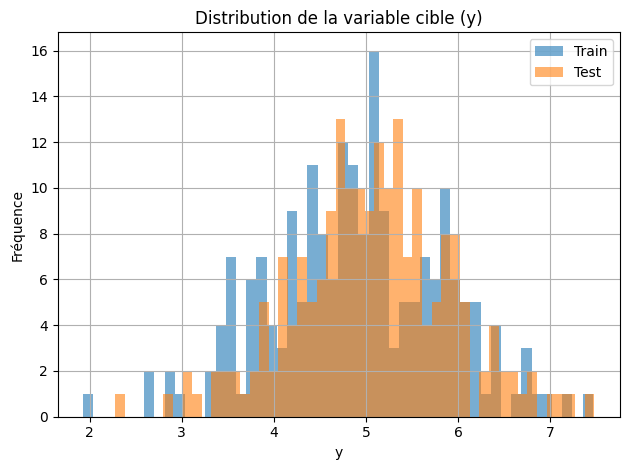

In [ ]:
"""
Cellule 2 : Distribution de la variable cible
"""

import matplotlib.pyplot as plt

plt.hist(y_train, bins=50, alpha=0.6, label="Train")
plt.hist(y_test, bins=50, alpha=0.6, label="Test")
plt.title("Distribution de la variable cible (y)")
plt.xlabel("y")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./data_distribution.png")
plt.show()


In [4]:
"""
Cellule 3 : Régression linéaire OLS (avec évaluation)
"""

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

y_pred_ols = ols_model.predict(X_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
mae_ols = mean_absolute_error(y_test, y_pred_ols)

print(f"OLS - MSE : {mse_ols:.4f}")
print(f"OLS - MAE : {mae_ols:.4f}")


OLS - MSE : 8.0383
OLS - MAE : 2.3423


In [5]:
"""
Cellule 4 : Régression Ridge (avec évaluation)
"""

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge - MSE : {mse_ridge:.4f}")
print(f"Ridge - MAE : {mae_ridge:.4f}")


Ridge - MSE : 0.2090
Ridge - MAE : 0.3643


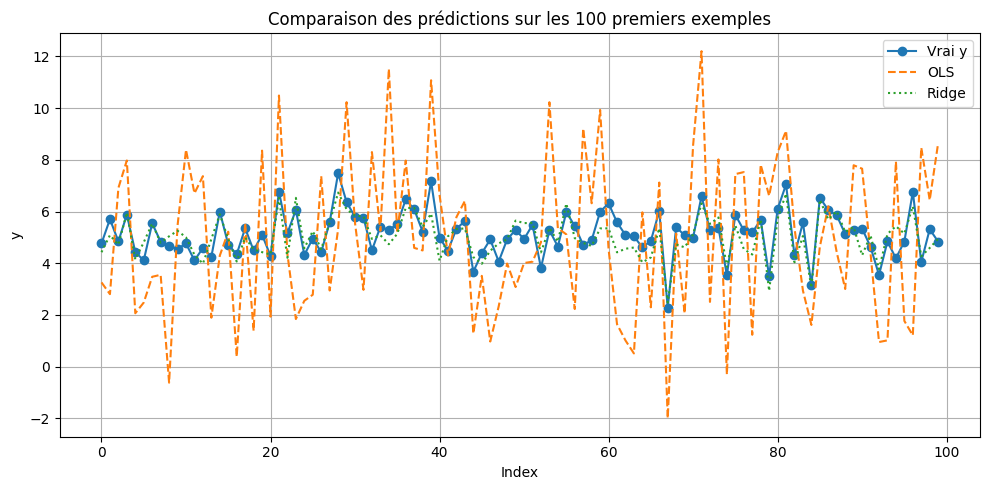

In [ ]:
"""
Cellule 5 : Comparaison visuelle des prédictions
"""

plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label="Vrai y", marker='o')
plt.plot(y_pred_ols[:100], label="OLS", linestyle="--")
plt.plot(y_pred_ridge[:100], label="Ridge", linestyle=":")
plt.title("Comparaison des prédictions sur les 100 premiers exemples")
plt.xlabel("Index")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./prediction_comparison.png")
plt.show()


In [9]:
"""
Cellule 6 : Tableau comparatif des performances
"""

import pandas as pd

df_perf = pd.DataFrame({
    "Modèle": ["OLS", "Ridge"],
    "MSE": [mse_ols, mse_ridge],
    "MAE": [mae_ols, mae_ridge]
})

print(df_perf)



  Modèle       MSE       MAE
0    OLS  8.038315  2.342344
1  Ridge  0.209021  0.364306
